# Demonstration of Integration with Statistical Clear Sky Fitting Package

8/25/20

### Notebook setup and library imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 13.7 seconds       



In [3]:
dh = DataHandler(data_frame)

In [4]:
dh.run_pipeline(power_col='ac_power')

total time: 9.49 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.02s
Cleaning                   0.18s
Filtering/Summarizing      6.29s
    Data quality           0.27s
    Clear day detect       0.21s
    Clipping detect        4.76s
    Capacity change detect 1.04s



Fit statistical clear sky model

In [5]:
dh.fit_statistical_clear_sky_model()

----------------------
SCSF Problem Setup
----------------------
Matrix Size: 96 x 1461 = 140256 power measurements
Sparsity: 72.91%
37997 non-zero measurements under clear conditions
Model size: 96 x 6 + 6 x 1461 = 9342 parameters


----------------------
Algorithm Iterations
----------------------
Starting at Objective: 9.542e+09, f1: 3.822e+07, f2: 4.433e+02, f3: 7.191e+09, f4: 2.312e+09
    Minimizing left matrix


/Users/bennetmeyers/miniconda3/envs/pvi-dev/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


    Minimizing right matrix
1 - Objective: 3.700e+07, f1: 3.483e+07, f2: 4.122e+02, f3: 2.170e+06, f4: 4.322e-05
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 3.237e+07, f1: 3.017e+07, f2: 1.863e+03, f3: 2.200e+06, f4: 2.102e-06
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 3.211e+07, f1: 2.992e+07, f2: 1.879e+03, f3: 2.193e+06, f4: 7.333e-06
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 3.208e+07, f1: 2.989e+07, f2: 1.925e+03, f3: 2.190e+06, f4: 1.614e-06
    Minimizing left matrix
    Minimizing right matrix
5 - Objective: 3.207e+07, f1: 2.988e+07, f2: 1.927e+03, f3: 2.186e+06, f4: 2.403e-05
Minimization complete in 2.05 minutes


The clear sky model is accessable as an attribute of the `DataHandler`

In [6]:
dh.scsf

The `SCSF` attribute is also a class, with its own plotting functions.

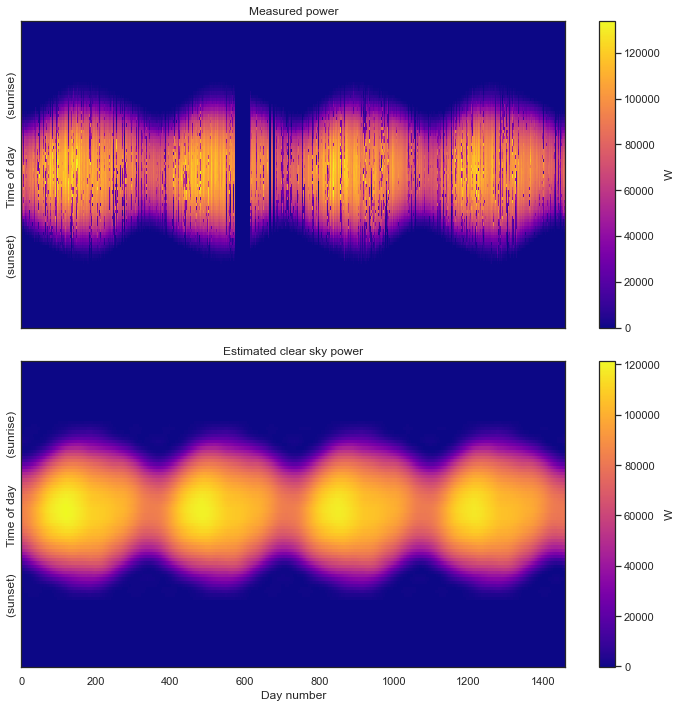

In [7]:
dh.scsf.plot_measured_clear_matrices(units='W');

Note that fitting the model estimates a degradation rate based on the data.

In [8]:
print('Estimated degradation: {:.2f}% per year'.format(dh.scsf.deg_rate * 100))

Estimated degradation: -1.22% per year


The `DataHandler` instance can access the data in the `SCSF` instance as well, as shown below.

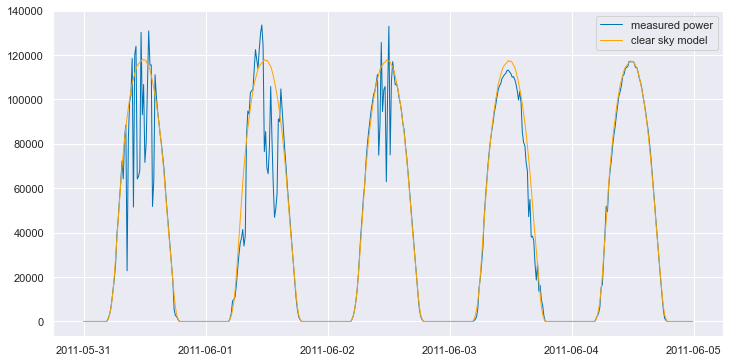

In [9]:
dh.plot_daily_signals(start_day=150, show_legend=True);

The fit model can be used for other tasks as well. Below, we use it to find clear *time periods* within the data set.

In [10]:
dh.find_clear_times()

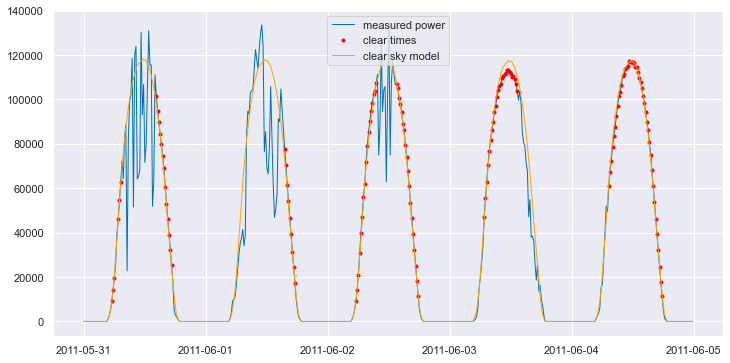

In [11]:
dh.plot_daily_signals(start_day=150, boolean_mask=dh.boolean_masks.clear_times, mask_label='clear times',
                      show_legend=True);